In [98]:
import pandas as pd

StudentsPerformance = pd.read_csv("C:\python\school-data-science-project\StudentsPerformance.csv")
df = pd.DataFrame(StudentsPerformance,columns=["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"])

def deg_change(i):
    if i == 'high school' or i == 'some high school':
        return 0
    return 1

def prep_change(i):
    if i == 'none':
        return 0
    return 1

df['parental level of education'] = df['parental level of education'].apply(deg_change)
df['test preparation course'] = df['test preparation course'].apply(prep_change)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1,standard,0,72,72,74
1,female,group C,1,standard,1,69,90,88
2,female,group B,1,standard,0,90,95,93
3,male,group A,1,free/reduced,0,47,57,44
4,male,group C,1,standard,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,1,standard,1,88,99,95
996,male,group C,0,free/reduced,0,62,55,55
997,female,group C,0,free/reduced,1,59,71,65
998,female,group D,1,standard,1,68,78,77


# Predikce

[64.91190897]


c:\Users\lleos\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     518.7
Date:                Fri, 31 Mar 2023   Prob (F-statistic):          1.25e-241
Time:                        20:38:02   Log-Likelihood:                -3574.0
No. Observations:                1000   AIC:                             7158.
Df Residuals:                     995   BIC:                             7182.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.2447      1.335      5.425      0.000       4.624       9.865
reading score                   0.5720      0.065      8.816      0.000       0.445       0.699
writing score                   0.2899      0.064      4.500      0.000       0.163       0.416
parental level of education     0.1216      0.587      0.207      0.836      -1.031       1.274
test preparation course        -1.4669      0.616     -2.380      0.017      -2.676      -0.258
==============================================================================
Omnibus:                       13.121   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.234
Skew:                           0.020   Prob(JB):                       0.0163
Kurtosis:                       2.557   Cond. No.                         485.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

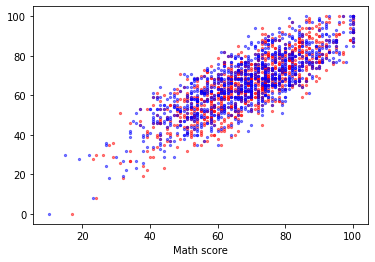

In [101]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

X = df[['reading score','writing score','parental level of education','test preparation course']]
Y = df['math score']

regr = linear_model.LinearRegression()
regr.fit(X, Y)

plt.scatter(df['reading score'],Y,color="red",s=5,alpha=0.5,marker="o")
plt.scatter(df['writing score'],Y,color="blue",s=5,alpha=0.5,marker="o")
plt.xlabel("Math score")
print(regr.predict([[75,56,0,1]]))

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
model.summary()